When you have more than two classes as an option, it is called as multiclass classification


Let's build a neural network to classify images of different items of clothing

Here's the link to the [dataset](https://https://www.tensorflow.org/datasets/catalog/fashion_mnist)

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

## Loading data into train and test labels

In [ ]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [ ]:
# What does the train data and label has
print(f"Training data: {train_data[0]}")
print(f"Training Label: {train_labels[0]}")

Training data: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1

In [ ]:
# Shape of the training data and labels
train_data[0].shape, train_labels[0].shape

((28, 28), ())

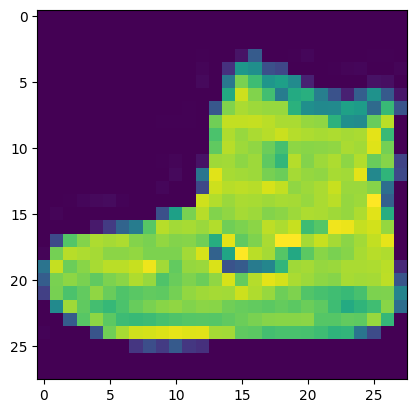

In [ ]:
# Getting visual of the first sample
plt.imshow(train_data[0]);


In [ ]:
# Create a list of class names
class_names = ["T-shirt/Top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

len(class_names)

10

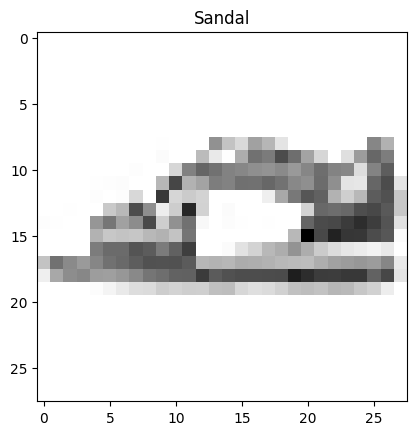

In [ ]:
# Since we got the class names, lets plot the image and its name
idx = 13
plt.imshow(train_data[idx], cmap=plt.cm.binary)
plt.title(class_names[train_labels[idx]]);

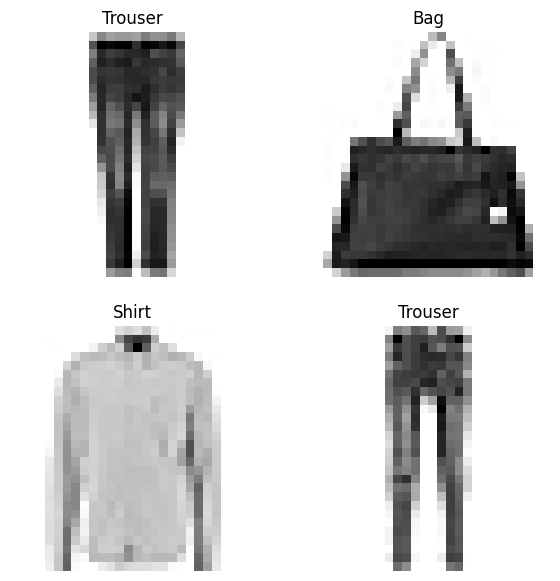

In [ ]:
# Try to plot multiple random images
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  random_idx = random.choice(range(len(train_data)))
  plt.imshow(train_data[random_idx], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[random_idx]])
  plt.axis(False)

## Building a multiclass classification model

For Multiclass classification we have to consider the following
- Input shape = 28 * 28 (The shape of one image)
- Output shape = 10 (number of classes)
- Loss Function - tf.keras.losses.CategoricalCrossEntropy
- Output activation - softmax

> NOTE:
whenever doing categorical cross entropy, pass labels as one hot encoded data
otherwise use SparseCategoricalCrossEntropy

In [ ]:
# set random seed
tf.random.set_seed(42)

# Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # this one is necessary to flatten the shape
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# Compile the model
model_1.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

non_norm_history = model_1.fit(
    train_data,
    train_labels,
    epochs=10,
    validation_data=(test_data, test_labels)
)

Epoch 1/10
1875/1875 [==============================] - 12s 4ms/step - loss: 2.4135 - accuracy: 0.0986 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0986 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3027 - accuracy: 0.1002 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 7s 3ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy

## Using categorical cross entropy with one hot coded labels

In [ ]:
# set random seed
tf.random.set_seed(42)

# Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# Compile the model
model_1.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

non_norm_history = model_1.fit(
    train_data,
    tf.one_hot(train_labels, depth=10),
    epochs=10,
    validation_data=(test_data, tf.one_hot(test_labels, depth=10))
)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3399 - accuracy: 0.0980 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3028 - accuracy: 0.0984 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3027 - accuracy: 0.1001 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy:

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Improving our model by normalizing

In [ ]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

Neural Networks prefer data to be scaled (or normalized), this means they like to have the numbers in the tensors they try to find patterns between 0 and 1

In [ ]:
# Converting training and testing data between 0 and 1
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# Check the min and max value of the scaled training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [ ]:
# since the data is now normalized, let's again build the model
tf.random.set_seed(42)

# Create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# compile the model
model_2.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# Fit the model
norm_history = model_2.fit(
    train_data_norm,
    train_labels,
    epochs=10,
    validation_data=(test_data_norm, test_labels)
)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 1.1415 - accuracy: 0.5470 - val_loss: 0.7761 - val_accuracy: 0.7172
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7042 - accuracy: 0.7471 - val_loss: 0.6943 - val_accuracy: 0.7506
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6470 - accuracy: 0.7682 - val_loss: 0.6758 - val_accuracy: 0.7520
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6272 - accuracy: 0.7781 - val_loss: 0.6395 - val_accuracy: 0.7701
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6160 - accuracy: 0.7800 - val_loss: 0.6633 - val_accuracy: 0.7620
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6040 - accuracy: 0.7848 - val_loss: 0.6295 - val_accuracy: 0.7755
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5957 - accuracy: 0.7885 - val_loss: 0.6466 - val_accuracy:

> Neural networks prefer data in numerical and scaled/normalized (numbers between 0 and 1) form

<Axes: title={'center': 'Normalized data'}>

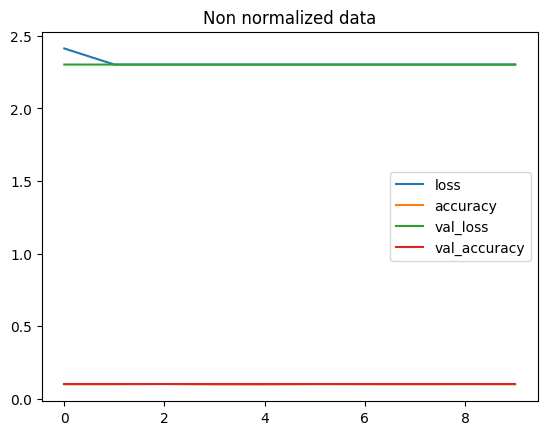

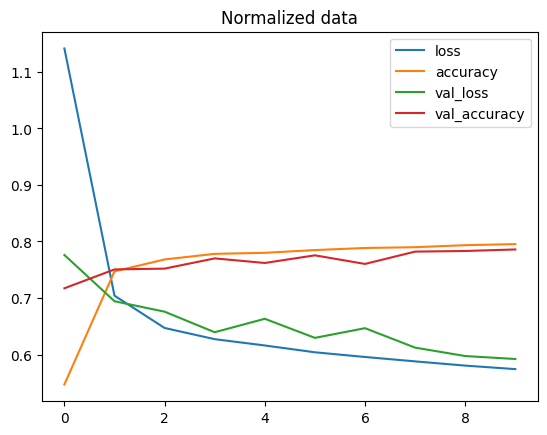

In [ ]:
import pandas as pd

# plot non normalized data
pd.DataFrame(non_norm_history.history).plot(title="Non normalized data")

# plot normalized data
pd.DataFrame(norm_history.history).plot(title="Normalized data")

## Find the ideal learning rate

In [ ]:
# Finding the ideal learning rate
tf.random.set_seed(42)

# Create model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# oompile the model
model_3.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10 ** (epoch/20))

# Fit the model
find_lr_history = model_3.fit(
    train_data_norm,
    train_labels,
    epochs=40,
    validation_data=(test_data_norm, test_labels),
    callbacks=[lr_scheduler]
)

Epoch 1/40
1875/1875 [==============================] - 7s 3ms/step - loss: 1.1432 - accuracy: 0.6327 - val_loss: 0.8242 - val_accuracy: 0.7346 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7292 - accuracy: 0.7574 - val_loss: 0.7149 - val_accuracy: 0.7598 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6617 - accuracy: 0.7696 - val_loss: 0.6703 - val_accuracy: 0.7653 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6333 - accuracy: 0.7768 - val_loss: 0.6486 - val_accuracy: 0.7721 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 7s 3ms/step - loss: 0.6172 - accuracy: 0.7799 - val_loss: 0.6414 - val_accuracy: 0.7751 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6041 - accuracy: 0.7835 - val_loss: 0.6499 - val_accuracy: 0.7718 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 7s

Text(0.5, 1.0, 'Finding the ideal learning rate')

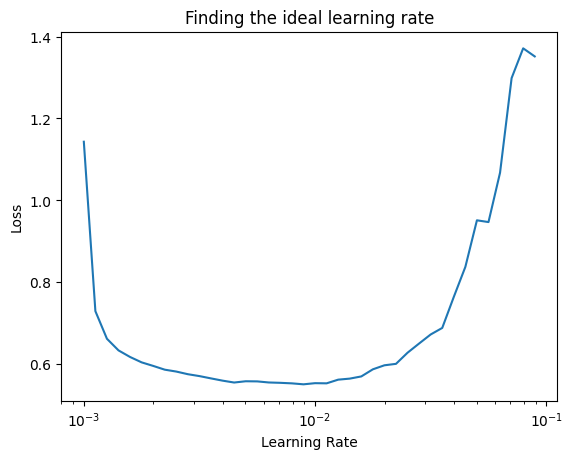

In [ ]:
# plot learning rate decay curve
import matplotlib.pyplot as plt
lrs = 1e-3 * (10 ** (tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

From the above curve we can say that the ideal learning rate is 0.001

## Evaluating multi-class Classification model
To evaluate multi class classification model we could:
* Evaluate its performance using other classification matrix (confusion matrix)
* Assess some of the predictions (using visualizations)
* Improve its results (by training it for longer or changing its architecture)
* Save and export it for use in an application

In [ ]:
# Create a confusion matrix
import itertools
from sklearn.metrics import confusion_matrix
import numpy as np

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10,10), text_size=20):

  # Create the confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.xaxis.label.set_size(text_size)
  ax.yaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.0

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)

In [ ]:
# Create a model with ideal learning rate
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_4.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

history_4 = model_4.fit(
    train_data_norm,
    train_labels,
    epochs=20,
    validation_data=(test_data_norm, test_labels)
)

Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 1.2650 - accuracy: 0.5198 - val_loss: 0.9324 - val_accuracy: 0.6676
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.8466 - accuracy: 0.7020 - val_loss: 0.8147 - val_accuracy: 0.7214
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7719 - accuracy: 0.7269 - val_loss: 0.7776 - val_accuracy: 0.7252
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7364 - accuracy: 0.7381 - val_loss: 0.7455 - val_accuracy: 0.7332
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7148 - accuracy: 0.7451 - val_loss: 0.7351 - val_accuracy: 0.7376
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6965 - accuracy: 0.7505 - val_loss: 0.7245 - val_accuracy: 0.7416
Epoch 7/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.6804 - accuracy: 0.7555 - val_loss: 0.7081 - val_accuracy:

In [ ]:
# making predictions with model
y_probs = model_4.predict(test_data_norm) # make prediction on same test data scale as trained data scale

# Remember that we will get the output in probabilities
y_probs[:2]

313/313 [==============================] - 1s 2ms/step


array([[4.70377643e-12, 9.15495995e-15, 2.68353336e-15, 1.14997595e-12,
        1.75932025e-15, 1.42487660e-01, 2.38569993e-12, 5.92202358e-02,
        1.93784857e-04, 7.98098266e-01],
       [4.76982072e-03, 6.00845803e-14, 7.08968580e-01, 1.34444053e-06,
        1.22484413e-03, 3.17819555e-11, 1.81979597e-01, 2.25379342e-08,
        1.03055745e-01, 1.64887472e-13]], dtype=float32)

> Remember to make predictions on same kind of data your model was trained on
- If training was done on normalized data, then make predictions on normalized data

In [ ]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([4.7037764e-12, 9.1549599e-15, 2.6835334e-15, 1.1499759e-12,
        1.7593203e-15, 1.4248766e-01, 2.3856999e-12, 5.9220236e-02,
        1.9378486e-04, 7.9809827e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [ ]:
# convert all prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)

# View the predictions now
y_preds[:20]

array([9, 2, 1, 1, 6, 1, 4, 2, 5, 7, 4, 5, 7, 3, 4, 1, 2, 2, 8, 0])

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[718,   1,  15, 122,  10,   2, 116,   1,  15,   0],
       [  0, 932,   5,  41,  14,   0,   6,   0,   2,   0],
       [ 14,   1, 631,  11, 218,   0, 119,   0,   6,   0],
       [ 48,  21,   8, 835,  30,   0,  52,   0,   6,   0],
       [  1,   1, 161,  34, 762,   2,  36,   0,   3,   0],
       [  0,   0,   0,   0,   0, 870,   1,  65,   1,  63],
       [156,   1, 350,  66, 169,   1, 238,   0,  19,   0],
       [  0,   0,   0,   0,   0,  40,   0, 891,   0,  69],
       [  4,   0,  46,  14,   4,  17,  14,   9, 892,   0],
       [  0,   0,   0,   0,   0,  35,   0,  46,   1, 918]])

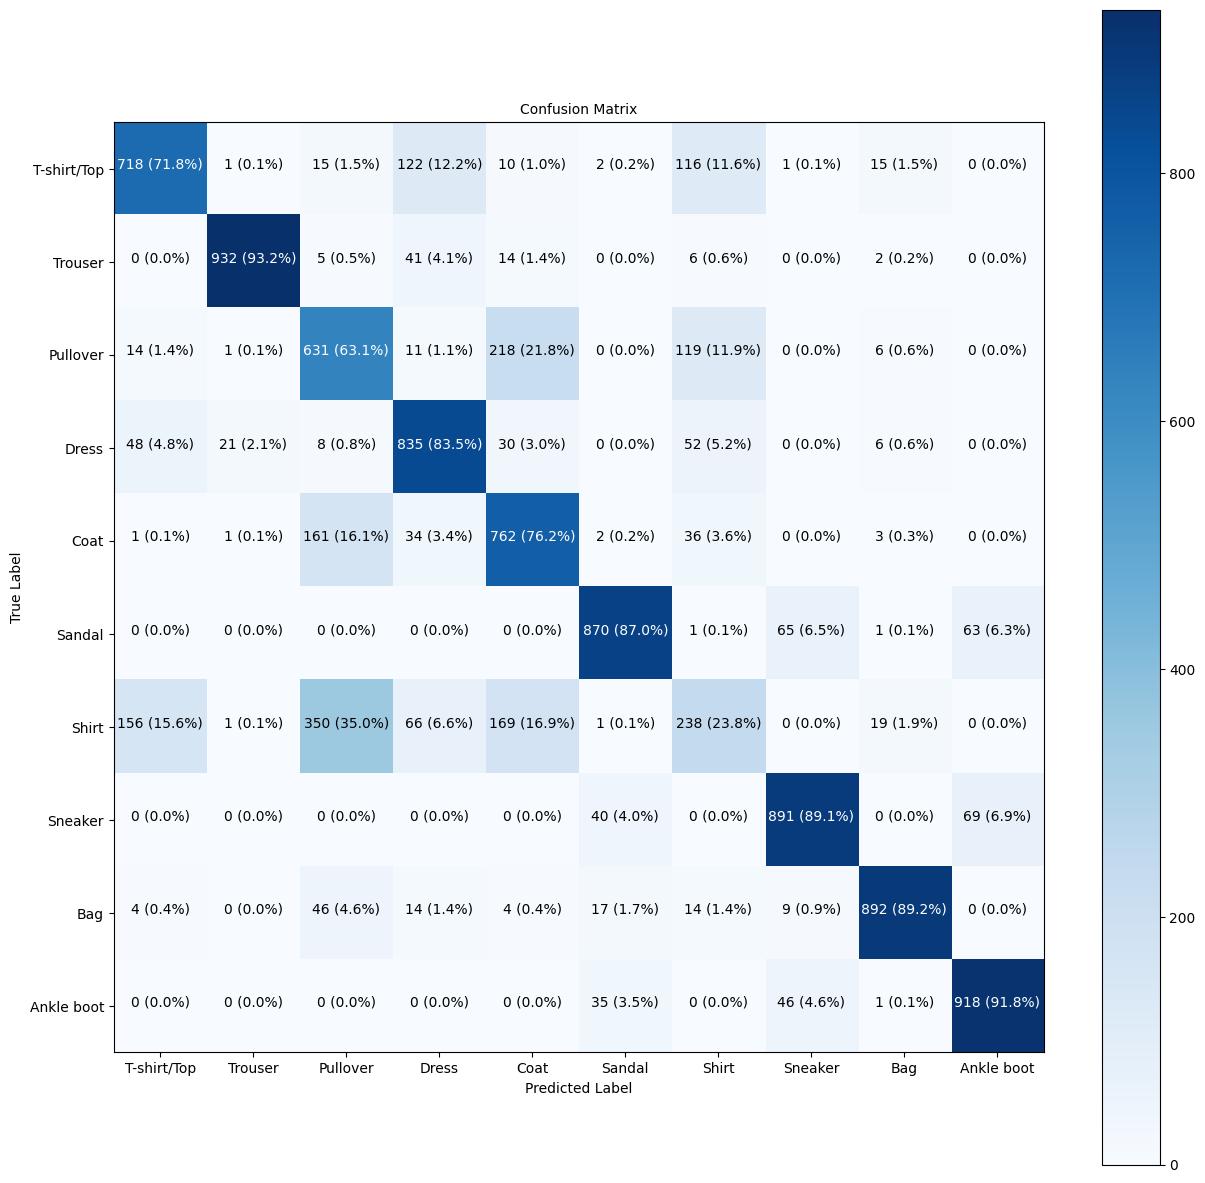

In [ ]:
# Make a prettier confusion matrix
make_confusion_matrix(
    y_true=test_labels,
    y_pred=y_preds,
    classes=class_names,
    figsize=(15, 15),
    text_size=10
)

> **Note:** Often when working with images and other forms of visual data, it's a good idea to visualize as much as possible to develop a further understanding of data and the inputs and outputs of your models

- Plot a random image
- make a prediction on the said image
- Label the plot with truth label and the predicted label

In [ ]:
import random

def plot_random_image(model, images, true_labels, classes):
  """
  Picks a random image, plots the image and labels it with predicted and truth label
  """
  # set up random integer
  i = random.randint(0, len(images))
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # plot the image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color based on correct prediction
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color
  )

1/1 [==============================] - 0s 22ms/step


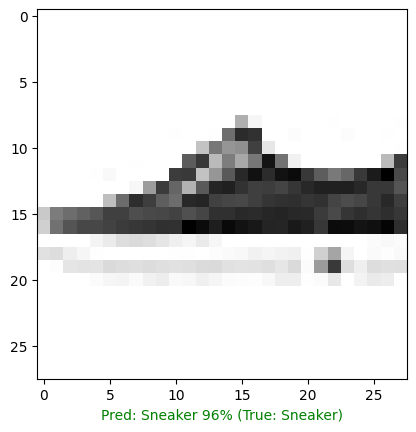

In [ ]:
# Checkout a random image as well as its prediction
plot_random_image(model=model_4,
                  images=test_data_norm,
                  true_labels=test_labels,
                  classes=class_names)

## What patterns is our model learning?

In [ ]:
# Find the layers of our most recent model
model_4.layers

In [ ]:
# Extract a particular layer
model_4.layers[1]

In [ ]:
# Get the patterns of a layer in our network
weights, biases = model_4.layers[1].get_weights()

# shapes
weights, weights.shape

(array([[ 0.08363402, -0.47661367,  0.7558352 , -0.8058079 ],
        [ 0.03307647,  0.09826822,  0.5461402 , -0.42291573],
        [-0.06327088,  0.01340135,  0.7008978 , -0.55547696],
        ...,
        [-0.08257089,  0.19322495,  0.23469724, -0.5305347 ],
        [-0.03090477,  1.336715  , -0.30922708, -1.23413   ],
        [ 0.06543197,  0.5450649 ,  0.5031062 , -0.7467755 ]],
       dtype=float32),
 (784, 4))

## Let's checkout the bias vector

In [ ]:
biases, biases.shape

(array([ 0.29560512,  0.6405704 , -0.01263297,  1.256638  ], dtype=float32),
 (4,))

Evary neuron has a bias vector. Each of these is paired with a weight matrix.
The bias vector get initialized as zeros (atleast in the casr of a tensorflow dense layer)
The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer

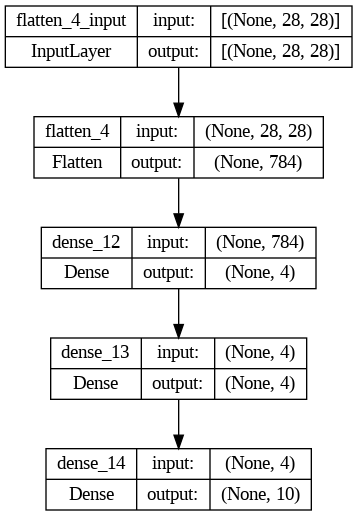

In [ ]:
# Let's checkout another way of viewing our deep learning models
from tensorflow.keras.utils import plot_model

# see the inputs and outputs of each layer
plot_model(model_4, show_shapes=True)